<a href="https://colab.research.google.com/github/wesmith4/mat210/blob/main/sports/round2seeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def getWinners(round):
    games = round.findChildren('div', recursive=False)
    
    seeds = []
    for game in games:
        teams = game.findChildren('div', recursive=False)
        for team in teams:
            seeds.append(int(team.find('span').string))
    return seeds

In [4]:
def getRound2Seeds(year):
    pageaddress = "https://www.sports-reference.com/cbb/postseason/{}-ncaa.html".format(year)
    soup = BeautifulSoup(urlopen(pageaddress), "html.parser")
    bracketDiv = soup.find_all('div', {'id': 'brackets'})[0]
    print('Finding teams from {}'.format(year))
       
    allWinners = []
    for region in range(4):
        bracket = bracketDiv.findChildren('div',recursive=False)[region].find_all('div', {'class': 'round'})[1]
        allWinners.extend(getWinners(bracket))
    allWinners = np.array(allWinners)
    
    return allWinners

In [5]:
allRound2Seeds = np.zeros((len(range(1990,2022)),32))
counter = 0
for year in range(1990,2022):
    if not year == 2020:
        allRound2Seeds[counter] = getRound2Seeds(year)
    counter += 1
allRound2Seeds = allRound2Seeds.astype(int)

Finding teams from 1990
Finding teams from 1991
Finding teams from 1992
Finding teams from 1993
Finding teams from 1994
Finding teams from 1995
Finding teams from 1996
Finding teams from 1997
Finding teams from 1998
Finding teams from 1999
Finding teams from 2000
Finding teams from 2001
Finding teams from 2002
Finding teams from 2003
Finding teams from 2004
Finding teams from 2005
Finding teams from 2006
Finding teams from 2007
Finding teams from 2008
Finding teams from 2009
Finding teams from 2010
Finding teams from 2011
Finding teams from 2012
Finding teams from 2013
Finding teams from 2014
Finding teams from 2015
Finding teams from 2016
Finding teams from 2017
Finding teams from 2018
Finding teams from 2019
Finding teams from 2021


In [15]:
df = pd.DataFrame(allRound2Seeds)
means = np.mean(df, axis=1)
variances = np.var(df,axis=1)

0     12.803711
1     16.327148
2     12.984375
3     12.984375
4     11.678711
5     15.000000
6     13.163086
7     13.514648
8     14.842773
9     15.308594
10     7.881836
11    17.374023
12    14.194336
13    11.871094
14     9.433594
15    13.339844
16    15.459961
17     8.334961
18    14.027344
19    14.683594
20    15.000000
21    12.803711
22    17.496094
23    17.250000
24    14.683594
25    12.803711
26    18.077148
27    11.089844
28    15.155273
29    15.000000
30     0.000000
31    17.496094
dtype: float64

In [16]:
stats = pd.DataFrame(range(1990,2022),columns=['year'])
stats['avg_seed'] = means
stats['variance'] = variances
stats = stats.set_index('year')
stats = stats.drop([2020])
stats

,avg_seed,variance
year,,
1990,5.59375,12.803711
1991,6.28125,16.327148
1992,5.62500,12.984375
1993,5.62500,12.984375
1994,5.40625,11.678711
1995,6.00000,15.000000
1996,5.65625,13.163086
1997,5.71875,13.514648
1998,5.96875,14.842773


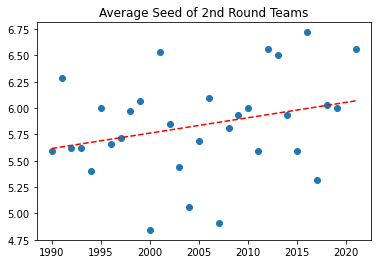

In [13]:
plt.scatter(stats.index, stats.avg_seed)

z = np.polyfit(stats.index, stats.avg_seed, 1)
p = np.poly1d(z)
plt.plot(stats.index,p(stats.index),"r--")
plt.title('Average Seed of 2nd Round Teams')
plt.show()

In [14]:
stats.sort_values(by='avg_seed',ascending=False).head()

,avg_seed,variance
year,,
2016,6.71875,18.077148
2021,6.56250,17.496094
2012,6.56250,17.496094
2001,6.53125,17.374023
2013,6.50000,17.250000


In [17]:
stats.sort_values(by='variance',ascending=False).head()

,avg_seed,variance
year,,
2016,6.71875,18.077148
2021,6.56250,17.496094
2012,6.56250,17.496094
2001,6.53125,17.374023
2013,6.50000,17.250000
